## 스타벅스 이벤트 관련 고객 설문 데이터

- 스타벅스 고객들의 이벤트 관련 설문에 응답한 데이터의 일부입니다.


- 해당 데이터에서 고객들이 이벤트에 대한 응답을 어떻게 하는지, 찾고 고객 프로모션 개선방안에 대한 인사이트를 찾습니다.

### 0. Data Description

1. Profile table

> profile 데이터는 설문에 참여한 스타벅스 회원에 관련된 정보가 담겨 있습니다.


2. transcript

> 이벤트에 참여한 실제 유저들의 응답이 기록되어 있습니다.


3. portfoilo

> 이벤트를 운영했던 내역에 관한 정보가 담겨 있습니다.

### 1. 라이브러리 및 데이터 로드

- 분석에 필요한 데이터와, 라이브러리를 불러옵니다.

In [2]:
# 데이터 분석 필수 라이브러리 4종 세트 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
# Starbucks Customer Data 폴더안에 있는 데이터 3개를 불러오기
transcript = pd.read_csv("Desktop/Starbucks Customer Data/transcript.csv")
portfolio = pd.read_csv('Desktop/Starbucks Customer Data/portfolio.csv')
profile = pd.read_csv("Desktop/Starbucks Customer Data/profile.csv")

### 2. 데이터 전처리

- 결측치가 존재하는 데이터를 찾아서, 결측치를 처리해줍니다.

In [4]:
# 1) 각 데이터에 결측치가 있는지 확인합니다.
transcript.isnull().sum()

Unnamed: 0    0
person        0
event         0
value         0
time          0
dtype: int64

In [5]:
# 2) 각 데이터에 결측치가 있는지 확인합니다.
portfolio.isnull().sum()

Unnamed: 0    0
reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [6]:
# 3) 각 데이터에 결측치가 있는지 확인합니다.
profile.isnull().sum()

Unnamed: 0             0
gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [26]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        14825 non-null  int64         
 1   gender            14825 non-null  object        
 2   age               14825 non-null  int64         
 3   id                14825 non-null  object        
 4   became_member_on  14825 non-null  datetime64[ns]
 5   income            14825 non-null  int32         
 6   years             14825 non-null  datetime64[ns]
 7   months            14825 non-null  object        
dtypes: datetime64[ns](2), int32(1), int64(2), object(3)
memory usage: 1.5+ MB


In [7]:
# 결측치를 포함하는 데이터들은 어떤 데이터들인지 확인합니다.
# 결측치를 포함하고 있는 데이터는 profile 밖에 없다.

In [8]:
# 결측치를 처리해줍니다. # 평균과 같은 통계량으로 채워주거나, 버립니다.
# profile = profile[pd.notnull(profile['gender'])]
# profile = profile[pd.notnull(profile['income'])]
profile = profile.dropna()

### 3. profile 데이터 분석

- 설문에 참여한 사람 중, 정상적인 데이터로 판단된 데이터에 대한 분석을 수행합니다.


- 각 column마다 원하는 통계량을 찾은 뒤, 해당 통계량을 멋지게 시각화해 줄 plot을 seaborn에서 가져와 구현합니다.

In [9]:
# profile의 became_member_on 데이터를 시간 정보로 변환해줍니다.
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format = "%Y%m%d")

#### 성별에 관한 분석
> 그래프를 통해서 알 수 있는 것은 "남성이 설문조사에 가장 많이 참여했다는 것을 알 수 있습니다."

Text(0.5, 1.0, 'Profile_genders')

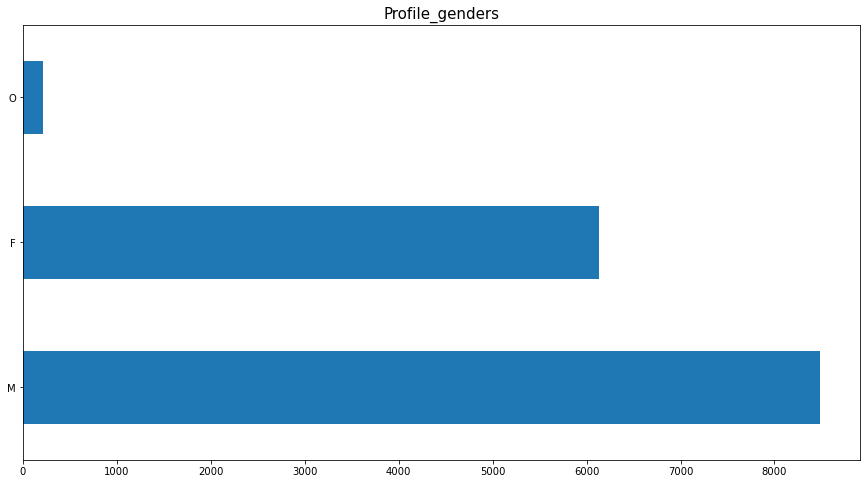

In [10]:
profile_genders = profile['gender'].value_counts()

profile_genders.plot.barh(figsize = (15, 8))
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Profile_genders', fontsize = 15)

#### 나이에 대한 분석
> '스세권'이라는 말이 있을 정도로 스타벅스를 이용하는 소비자가 많다는 것을 알 수 있습니다. 또한, 국내 스타벅스를 이용하는 주요 고객은 대학생, 직장인입니다. 그럼에도 불구하고 그래프를 통해서 알 수 있는 것은 설문조사에 참여한 세대는 40 ~ 70대가 가장 많습니다.

> 이것을 통해서 생각해볼 수 있는 것은 "스타벅스의 주요 연령층은 확실하게 대학생, 직장인인가?" 대학생, 직장인이 주요 연령층이라면 설문조사 비중은 왜 이렇게 낮은걸까?

> 나이를 성별로도 함께 데이터를 시각화했습니다. 그 결과 젊은 20~30대를 비교해보면 설문조사 참여율은 여성이 남성보다 낮게 나온 것을 알 수 있습니다.

<AxesSubplot:xlabel='age', ylabel='Count'>

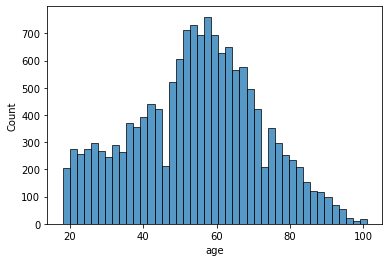

In [11]:
# 가장 좋은 것은 10대, 20대, 30대 .. 이런식으로 분류해서 표현하는 것이 가장 좋다.
sns.histplot(data = profile, x = 'age')

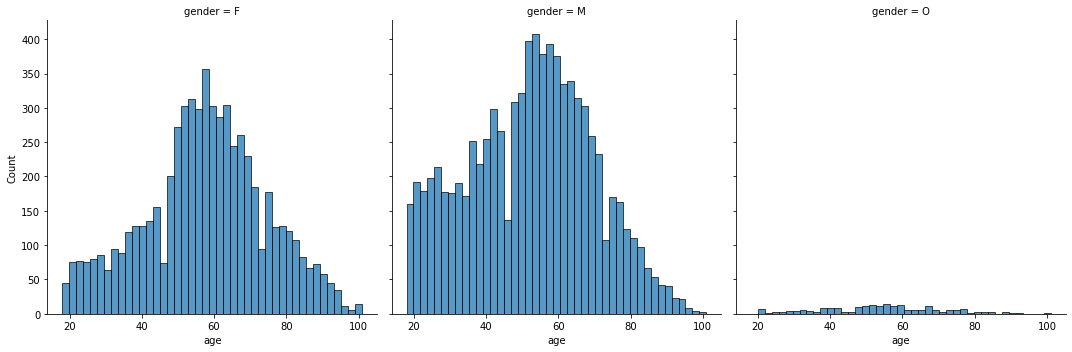

In [23]:
sns.displot(data = profile, x = 'age', col = 'gender')

#### 회원이 된 날짜에 대한 분석
> 2013년부터 2016년까지 꾸준하게 회원률이 증가하고 있고, 2017년에 급속도로 많아진 것을 알 수 있습니다. 그렇다면, 2017년에 사회적 이슈나 스타벅스가 진행한 이벤트로 인해서 회원률이 증가한지에 대한 여부를 파악하면 좋을 것 같습니다.

> 반대로, 2017년에서 2018년은 회원률이 떨어졌습니다. 이에 대한 이유는 무엇일까요?

Text(0.5, 1.0, 'became_memeber_years')

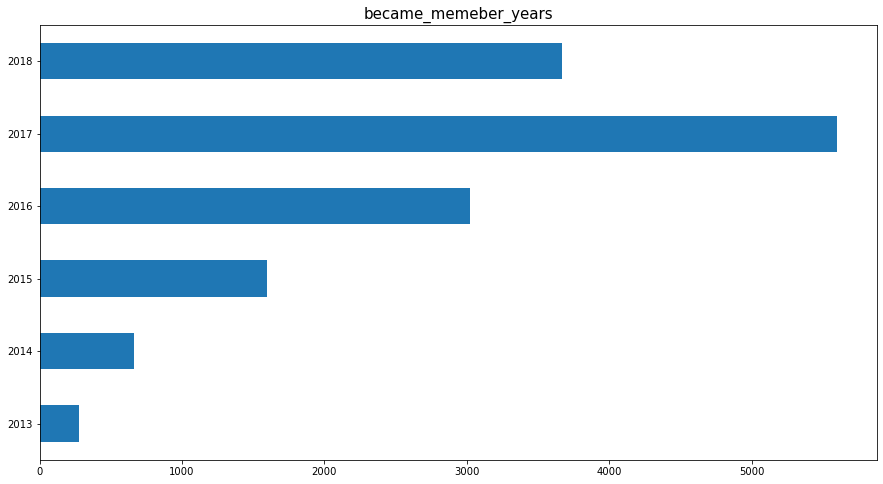

In [12]:
# 회원이 된 년도에 대한 분석

def get_became_years(date):
    return datetime(date.year, 1, 1)

profile['years'] = profile['became_member_on'].apply(get_became_years)
profile_years = profile.groupby('years').count()['id']
profile_years.index = ['2013', '2014', '2015', '2016', '2017', '2018']


profile_years.plot.barh(figsize = (15, 8))
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('became_memeber_years', fontsize = 15)

Text(0.5, 1.0, 'became_memeber_months')

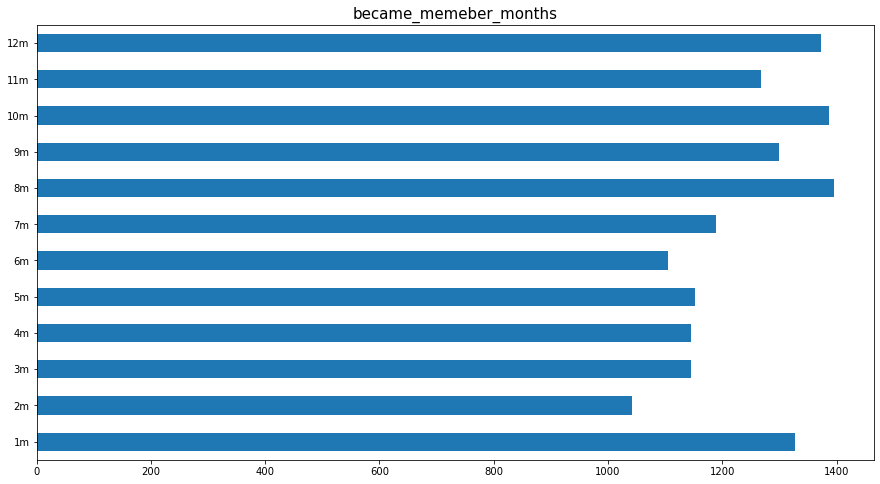

In [13]:
# 회원이 된 달에 대한 분석
def get_became_months(date):
    return datetime(1, date.month, 1)

profile['months'] = profile['became_member_on'].apply(get_became_months)

profile_months = profile.groupby('months').count()['id']
profile_months.index = ['1m', '2m', '3m', '4m', '5m', '6m', '7m', '8m', '9m', '10m', '11m', '12m']

profile_months.plot.barh(figsize = (15, 8))
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('became_memeber_months', fontsize = 15)

#### 수입에 대한 분석
> 설문조사에 참여한 사람들의 수입 분포는 80000 이하에 많이 분포한 것을 알 수 있습니다.

> 수입과 연령층을 나누어 볼 수 있다면, 좀 더 심도있는 분석을 할 수 있을텐데..
연령층을 10대 ~ 100대로 나누고 그룹핑하고, ['income']을 불러오면?

In [14]:
profile['income'] = profile['income'].astype(np.int32)

<AxesSubplot:xlabel='income', ylabel='Count'>

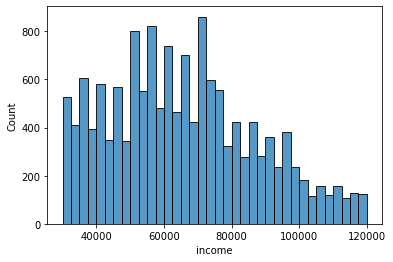

In [31]:
sns.histplot(data = profile, x = 'income')

#### profile 데이터에 대한 상관관계 분석

### 4. transcript에 대한 분석

- 각 column마다 원하는 통계량을 찾은 뒤, 해당 통계량을 멋지게 시각화해 줄 plot을 seaborn에서 가져와 구현합니다.


- `person`과 `values` column은 분석 대상에서 제외합니다.


> values에 대한 패턴이 궁금하다면, 아래 코드를 참고해보세요 ! (배우지 않은 내용이 있어, 어려울 수 있습니다)

#### event에 대한 분석
> event에 가장 많이 참여한 것은 transaction입니다.

Text(0.5, 1.0, 'transcript_event')

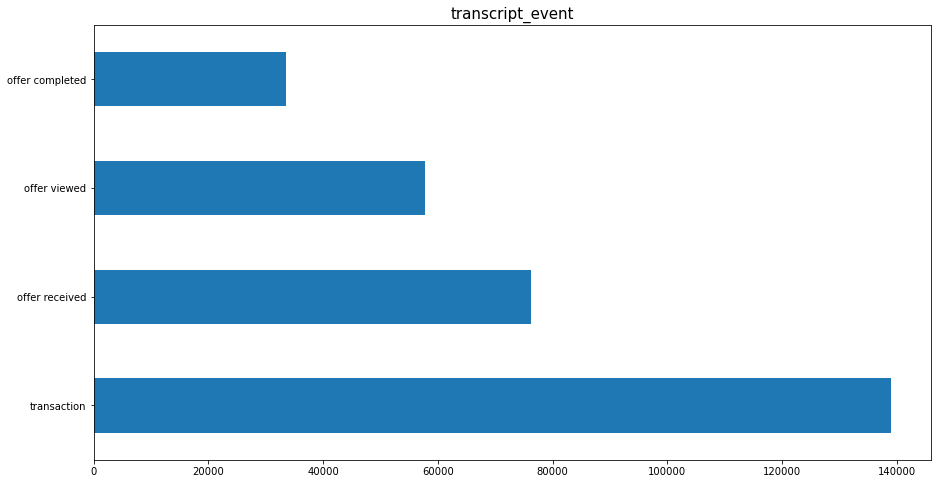

In [16]:
transcript_event = transcript['event'].value_counts()
transcript_event.plot.barh(figsize = (15, 8))
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('transcript_event', fontsize = 15)

#### time에 대한 분석
> time이 의미하는 바가 초인지, 분인지 잘 모르겠습니다.

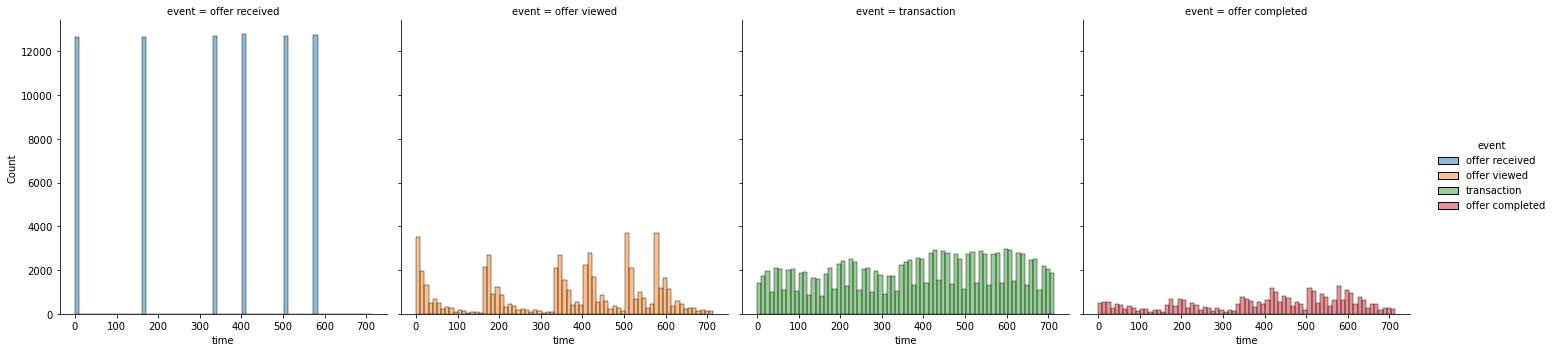

In [17]:
sns.displot(data=transcript, x='time', hue='event', col='event')

In [40]:
transcript_time = transcript['time'].value_counts().sort_values()

<AxesSubplot:>

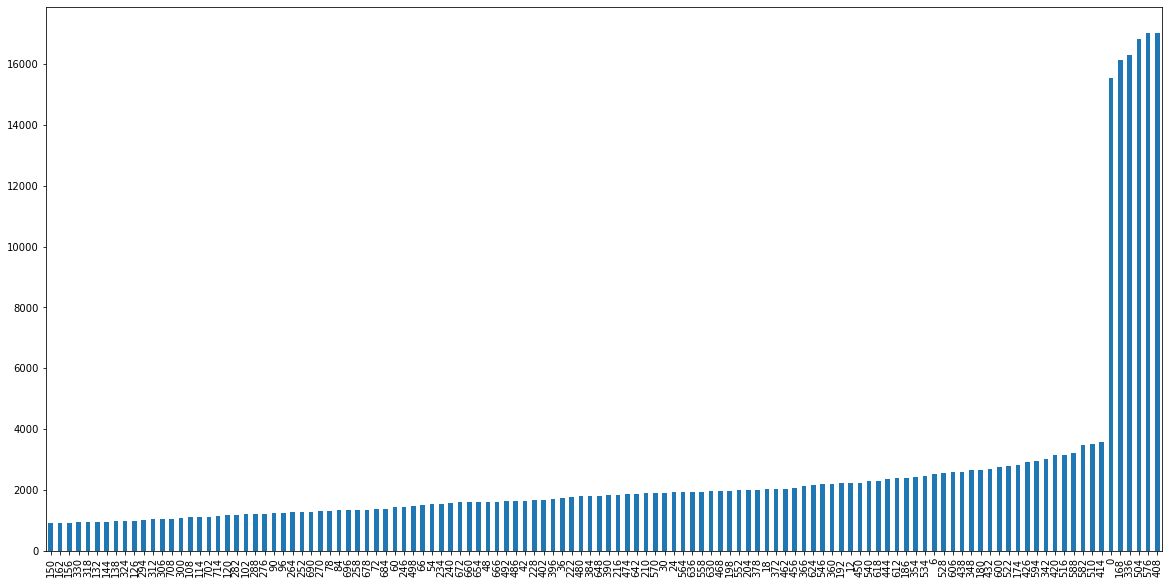

In [42]:
transcript_time.plot.bar(figsize = (20, 10))